# Testing overfitting

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [4]:
# Ruta al archivo kaggle.json
kaggle_json_path = "./kaggle.json"

# Configurar la API para usar el archivo en esta ubicación
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Autenticar con la API
api = KaggleApi()
api.authenticate()

# Descargar el dataset
dataset_name = "mlg-ulb/creditcardfraud"
download_path = "./data"
os.makedirs(download_path, exist_ok=True)

print("Descargando el dataset...")
api.dataset_download_files(dataset_name, path=download_path, unzip=True)

# Cargar el dataset
dataset_file_path = os.path.join(download_path, "creditcard.csv")
df = pd.read_csv(dataset_file_path)

print("Dataset cargado correctamente:")
print(df.head())


Descargando el dataset...
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
Dataset cargado correctamente:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575 

In [6]:
# Verificar información básica del dataset
print("Información del dataset:")
print(df.info())

# Resumen estadístico
print("Estadísticas descriptivas:")
print(df.describe())

# Distribución de las clases
print("Distribución de clases:")
print(df['Class'].value_counts())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null

In [19]:
# Separar características (X) y etiqueta (y)
X = df.drop(columns=["Class"])
y = df["Class"]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocesamiento completado.")


Preprocesamiento completado.


In [20]:
input_dim = X_train_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation="relu")(input_layer)
encoded = Dense(8, activation="relu")(encoded)
decoded = Dense(16, activation="relu")(encoded)
decoded = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

# Entrenar el autoencoder
history = autoencoder.fit(
    X_train_scaled,
    X_train_scaled,
    epochs=50,
    batch_size=256,
    validation_data=(X_test_scaled, X_test_scaled),
    verbose=1
)

print("Entrenamiento del autoencoder completado.")


Epoch 1/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8916 - val_loss: 0.6417
Epoch 2/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6224 - val_loss: 0.5866
Epoch 3/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5729 - val_loss: 0.5547
Epoch 4/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5518 - val_loss: 0.5345
Epoch 5/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5298 - val_loss: 0.5225
Epoch 6/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5195 - val_loss: 0.5159
Epoch 7/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5108 - val_loss: 0.5095
Epoch 8/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5075 - val_loss: 0.5034
Epoch 9/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5080 - val_loss: 0.5009
Epoch 10/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5006 - val_loss: 0.4950
Epoch 11/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4950 - val_loss: 0.4908
Epoch 12/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [21]:
#Calcular el error de reconstrucción
reconstructed_train = autoencoder.predict(X_train_scaled)
reconstruction_error_train = np.mean(np.power(X_train_scaled - reconstructed_train, 2), axis=1)

reconstructed_test = autoencoder.predict(X_test_scaled)
reconstruction_error_test = np.mean(np.power(X_test_scaled - reconstructed_test, 2), axis=1)

# Establecer un umbral basado en el percentil 95 del error de reconstrucción en la clase 0
threshold = np.percentile(reconstruction_error_train[y_train == 0], 95)

print(f"Umbral de error de reconstrucción: {threshold}")

# Clasificar basado en el umbral
y_pred_autoencoder = (reconstruction_error_test > threshold).astype(int)

# Evaluar el desempeño
print("Reporte de clasificación (Autoencoder con error de reconstrucción):")
print(classification_report(y_test, y_pred_autoencoder))

print("Matriz de confusión (Autoencoder con error de reconstrucción):")
print(confusion_matrix(y_test, y_pred_autoencoder))

7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 784us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step
Umbral de error de reconstrucción: 1.0368104031833925
Reporte de clasificación (Autoencoder con error de reconstrucción):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.02      0.64      0.04        98

    accuracy                           0.95     56962
   macro avg       0.51      0.80      0.51     56962
weighted avg       1.00      0.95      0.97     56962

Matriz de confusión (Autoencoder con error de reconstrucción):
[[53925  2939]
 [   35    63]]


In [22]:
#Extraer características codificadas del autoencoder
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# Aplicar SMOTE a las características codificadas
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

print("SMOTE aplicado. Nuevas distribuciones de clases:")
print(pd.Series(y_train_resampled).value_counts())


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 6s 876us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step
SMOTE aplicado. Nuevas distribuciones de clases:
Class
0    227451
1    227451
Name: count, dtype: int64


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Predicciones con probabilidades
y_pred_proba_rf = rf_clf.predict_proba(X_test_encoded)[:, 1]

# Ajustar el umbral
threshold_rf = 0.2  # Ajustar según sea necesario
y_pred_rf = (y_pred_proba_rf >= threshold_rf).astype(int)

# Evaluar el modelo
print("Reporte de clasificación (Random Forest, umbral ajustado):")
print(classification_report(y_test, y_pred_rf))

print("Matriz de confusión (Random Forest, umbral ajustado):")
print(confusion_matrix(y_test, y_pred_rf))


Reporte de clasificación (Random Forest, umbral ajustado):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.23      0.89      0.37        98

    accuracy                           0.99     56962
   macro avg       0.62      0.94      0.68     56962
weighted avg       1.00      0.99      1.00     56962

Matriz de confusión (Random Forest, umbral ajustado):
[[56580   284]
 [   11    87]]


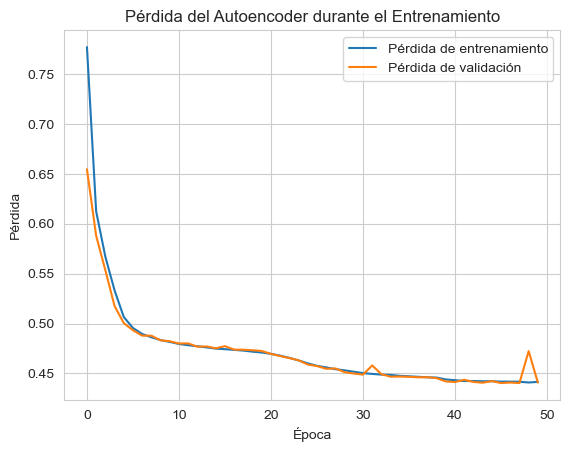

In [14]:
# Graficar la pérdida del autoencoder durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.title("Pérdida del Autoencoder durante el Entrenamiento")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.show()


In [17]:

# Separar características y etiquetas
X = df.drop(columns=["Class"])
y = df["Class"]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar el modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_clf.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación (Random Forest sin Autoencoder):")
print(classification_report(y_test, y_pred))

print("Matriz de confusión (Random Forest sin Autoencoder):")
print(confusion_matrix(y_test, y_pred))

Reporte de clasificación (Random Forest sin Autoencoder):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Matriz de confusión (Random Forest sin Autoencoder):
[[85281    14]
 [   32   116]]
